## # Introduction
<p><img src="https://assets.datacamp.com/production/project_981/img/lego_unsplash.jpg" alt="A picture of Lego characters!"></p>
<h3 id="letslookatlegosets">Let's look at Lego sets!</h3>
<p>Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.</p>
<p>It may not be widely known, but Lego has had its share of ups and downs since its inception in the early 20th century. This includes a particularly rough period in the late 90s. As described in <a href="https://www.businessinsider.com/how-lego-made-a-huge-turnaround-2014-2?r=US&IR=T">this article</a>, Lego was only able to survive due to a successful internal brand (Bionicle) and the introduction of its first licensed series: Star Wars. In the instructions panel are the two questions you will need to answer to complete this project.</p>
<p>Before diving into our analysis though, let's become familiar with the two datasets that will help you with this project:<br><br></p>
<div style="background-color: #ebf4f7; color: #595959; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/lego_sets.csv</b></div>
<ul>
    <li><b>set_num:</b> A code that is unique to each set in the dataset. <b><i>This column is critical, and a missing value indicates the set is a duplicate or invalid!</i></b></li>
    <li><b>set_name:</b> A name for every set in the dataset (note that this can be the same for different sets).</li>
    <li><b>year:</b> The date the set was released.</li>
    <li><b>num_parts:</b> The number of parts contained in the set.<b><i> This column is not central to our analyses, so missing values are acceptable.</i></b></li>
        <li><b>theme_name:</b> The name of the sub-theme of the set.</li>
    <li><b>parent_theme:</b> The name of the parent theme the set belongs to. Matches the `name` column of the `parent_themes` csv file.</li>
</ul>

<div style="font-size:20px"><b>datasets/parent_themes.csv</b></div>
<ul>
    <li><b>id:</b> A code that is unique to every theme.</li>
    <li><b>name:</b> The name of the parent theme.</li>
    <li><b>is_licensed:</b> A Boolean column specifying whether the theme is a licensed theme.</li>
</ul>
    </div>
<p>From here on out, it will be your task to explore and manipulate the existing data until you are able to answer the two questions described in the instructions panel. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><em><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/33">Intro to Projects</a> first to learn about the interface. In this project, you also need to know your way around <code>pandas</code> DataFrames and it's recommended that you take a look at the course <a href="https://www.datacamp.com/courses/data-manipulation-with-pandas">Data Manipulation with pandas</a>.</em></p>

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

In [74]:
# function to classify features
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype in ['object', 'bool', 'category']: 
            if df[column].nunique() < 15:
                categorical_features.append(column)
            else: 
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else: 
                continuous_features.append(column)
    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [75]:
lego_df = pd.read_csv('/Users/dani/Data Science/Projects/DataCamp Projects/Exploring the Evolution of Lego/datasets/lego_sets.csv')
lego_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11986 entries, 0 to 11985
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   set_num       11833 non-null  object 
 1   name          11833 non-null  object 
 2   year          11986 non-null  int64  
 3   num_parts     6926 non-null   float64
 4   theme_name    11833 non-null  object 
 5   parent_theme  11986 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 562.0+ KB


In [76]:
categorical, non_categorical, discrete, continuous = classify_features(lego_df)

print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: []
Non-Categorical Features: ['set_num', 'name', 'theme_name', 'parent_theme']
Discrete Features: []
Continuous Features: ['year', 'num_parts']


In [77]:
for i in non_categorical:
    #print(i, ':')
    print(lego_df[i].value_counts())
    print()

set_num
00-1       1
720-1      1
7191-1     1
7194-1     1
7195-1     1
          ..
4267-1     1
427-1      1
4271-1     1
4274-1     1
wwgp1-1    1
Name: count, Length: 11833, dtype: int64

name
Basic Building Set                                        55
Universal Building Set                                    32
Basic Set                                                 23
Helicopter                                                23
Tow Truck                                                 14
                                                          ..
Darth Vader 10 Year Anniversary Promotional Minifigure     1
Transformer and Speed Regulator                            1
Brick Tub 'Die Lego Show' - Limited Edition                1
Container Double Stack                                     1
Wild West Limited Edition Gift Pack                        1
Name: count, Length: 10512, dtype: int64

theme_name
Supplemental             497
Technic                  439
City                

In [78]:
df_miss = (lego_df.isnull().sum() / len(lego_df)) * 100
df_miss = df_miss.drop(df_miss[df_miss == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_miss})
missing_data.head(10)

,Missing Ratio
num_parts,42.215919
set_num,1.276489
name,1.276489
theme_name,1.276489


/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:2745: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


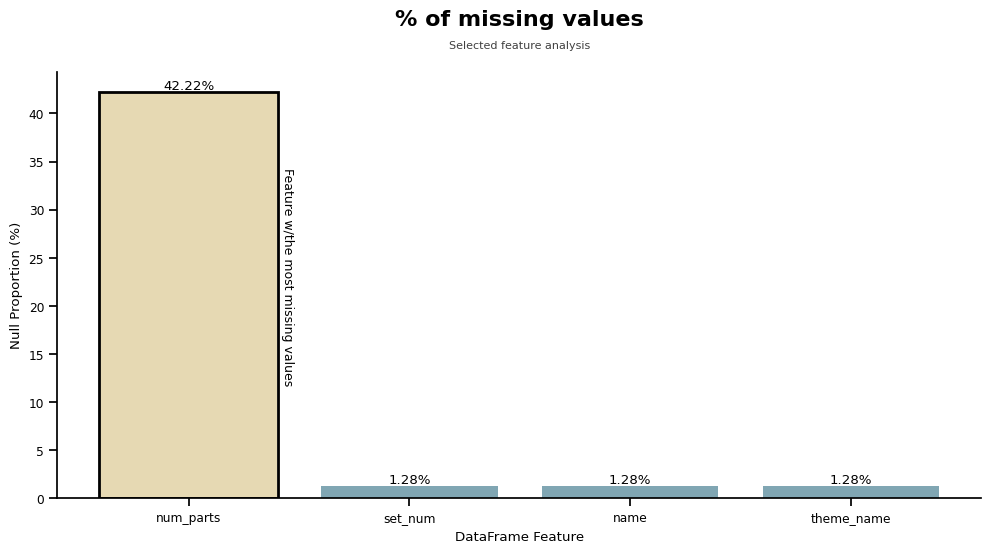

In [120]:
sns.set_context("notebook", font_scale=.8)

fig, ax = plt.subplots(figsize=(10, 8))
plt.close()
g = sns.catplot(data=missing_data,
            x=missing_data.index,
            y='Missing Ratio',
            kind='bar',
            hue='Missing Ratio',
            height=5,
            aspect=2,
            legend=None,
            #color= '#9999CC',
            palette="blend:#7AB,#EDA",
            ax=ax
            )

ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', color='black')

g.set(xlabel='DataFrame Feature', ylabel='Null Proportion (%)')

ax.autoscale()
ax.text(x=0.5, y=1.1, s='% of missing values', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Selected feature analysis', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

from matplotlib.patches import Rectangle

ax.add_patch(Rectangle((-.405, 0), .81, 42.2, fill=False, edgecolor='black', lw=2))
ax.text(0.42, 12, "Feature w/the most missing values", fontsize = 9, color = "black", rotation = -90)
# ax.text(-.55, 21)
plt.show()

In [79]:
lego_df.isna().sum()

set_num          153
name             153
year               0
num_parts       5060
theme_name       153
parent_theme       0
dtype: int64

In [80]:
lego_df.duplicated().sum()

44

In [81]:
lego_df[['year','num_parts']].corr(method='pearson')

,year,num_parts
year,1.000000,0.120919
num_parts,0.120919,1.000000


In [82]:
lego_df = lego_df.dropna(subset=['set_num', 'name', 'theme_name'])
lego_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11833 entries, 0 to 11832
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   set_num       11833 non-null  object 
 1   name          11833 non-null  object 
 2   year          11833 non-null  int64  
 3   num_parts     6835 non-null   float64
 4   theme_name    11833 non-null  object 
 5   parent_theme  11833 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 647.1+ KB


In [83]:
parent_df = pd.read_csv('/Users/dani/Data Science/Projects/DataCamp Projects/Exploring the Evolution of Lego/datasets/parent_themes.csv')
parent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           111 non-null    int64 
 1   name         111 non-null    object
 2   is_licensed  111 non-null    bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 2.0+ KB


In [84]:
categorical, non_categorical, discrete, continuous = classify_features(parent_df)

print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['is_licensed']
Non-Categorical Features: ['name']
Discrete Features: []
Continuous Features: ['id']


In [85]:
for i in categorical:
    #print(i, ':')
    print(parent_df[i].value_counts())
    print()

is_licensed
False    89
True     22
Name: count, dtype: int64



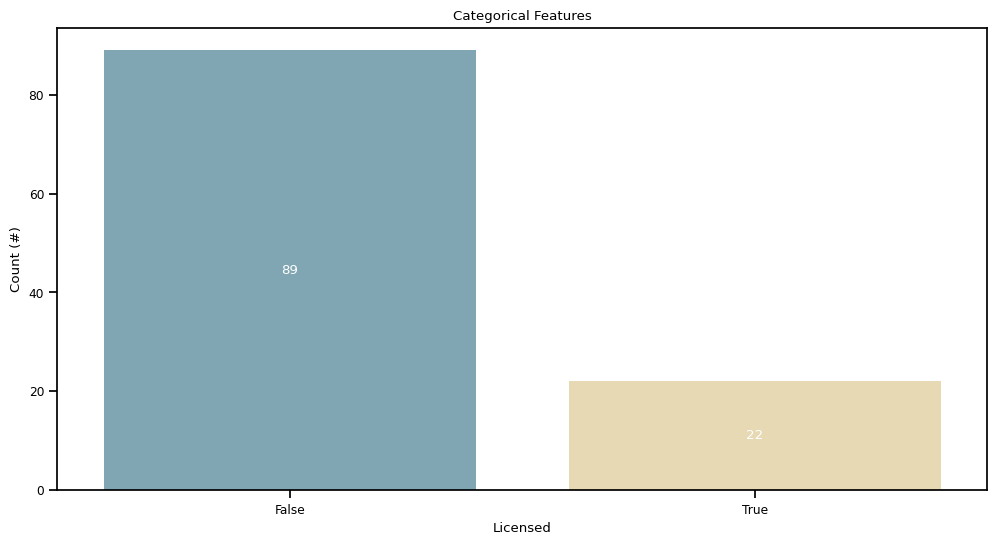

In [122]:
for i in categorical:
    fig, ax = plt.subplots(figsize=(12, 6))
    g = sns.countplot(x=i, data=parent_df, palette="blend:#7AB,#EDA", hue=i, legend=None, ax=ax)
    plt.xticks(rotation = None)
    plt.title('Categorical Features') 
    g.set_xlabel('Licensed')
    g.set_ylabel('Count (#)')
    for c in ax.containers:
        labels = [f'{round((v.get_height())):,}' for v in c]
        ax.bar_label(c, labels=labels, label_type='center', color='white')
    plt.show()

In [87]:
parent_df.isna().sum()

id             0
name           0
is_licensed    0
dtype: int64

In [88]:
parent_df.duplicated().sum()

0

In [89]:
licensed_filter = parent_df.query('is_licensed == True')['name']

licensed_df = lego_df['parent_theme'].isin(licensed_filter)

In [90]:
licensed_sets = lego_df[licensed_df]

In [91]:
star_wars = len(licensed_sets.query('parent_theme == "Star Wars" '))
total = len(licensed_sets)
the_force = int((star_wars/total)*100)

In [92]:
licensed_pivot = licensed_sets.pivot_table(index='year', columns='parent_theme', values='set_num', aggfunc='count')
display(licensed_pivot)

parent_theme,Angry Birds,Avatar,Ben 10,Cars,Disney,Disney Princess,Disney's Mickey Mouse,Ghostbusters,Harry Potter,Indiana Jones,...,Pirates of the Caribbean,Prince of Persia,Scooby-Doo,SpongeBob SquarePants,Star Wars,Super Heroes,Teenage Mutant Ninja Turtles,The Hobbit and Lord of the Rings,The Lone Ranger,Toy Story
year,,,,,,,,,,,,,,,,,,,,,
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,...,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,...,NaN,NaN,NaN,NaN,28.0,3.0,NaN,NaN,NaN,NaN
2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,32.0,5.0,NaN,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,...,NaN,NaN,NaN,NaN,20.0,6.0,NaN,NaN,NaN,NaN
2005,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,28.0,1.0,NaN,NaN,NaN,NaN
2006,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,11.0,8.0,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,2.0,16.0,2.0,NaN,NaN,NaN,NaN


In [93]:
new_era = int(licensed_pivot[licensed_pivot['Star Wars'] < licensed_pivot.max(axis='columns')].index[0])
display(new_era)

2017